# libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
covid=pd.read_csv(r'C:\Users\cheta\OneDrive\Documents\1 Python (AI_ML)\1project dataset\2 country_wise_latest.csv')

# Understand dataset

In [5]:
(78.0/10621)*100

0.7343941248470013

In [6]:
covid.sample(7)


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
126,Norway,9132,255,8752,125,15,0,0,2.79,95.84,2.91,9034,98,1.08,Europe
59,Fiji,27,0,18,9,0,0,0,0.00,66.67,0.00,27,0,0.00,Western Pacific
43,Croatia,4881,139,3936,806,24,3,70,2.85,80.64,3.53,4370,511,11.69,Europe
129,Panama,61442,1322,35086,25034,1146,28,955,2.15,57.10,3.77,54426,7016,12.89,Americas


In [7]:
covid.shape

(187, 15)

In [8]:
covid.info()
# covid.dtypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [9]:
covid.isna().sum() # data is not contin nan values

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

# Data Cleaning

##### Covid data no contain any null values so we can move to next steps

# Outlier Detection

### Method 1 :- Visualization 

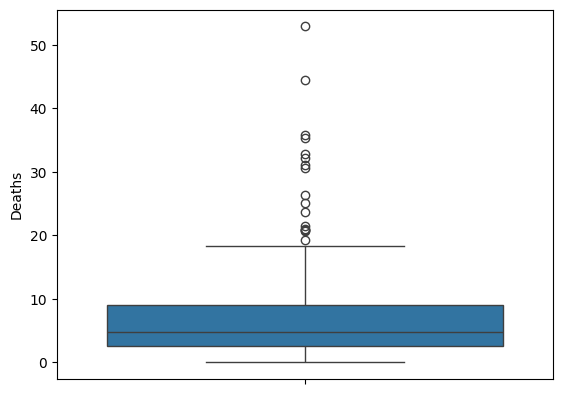

In [16]:
sns.boxplot(np.cbrt(covid['Deaths']));

<Axes: ylabel='Deaths'>

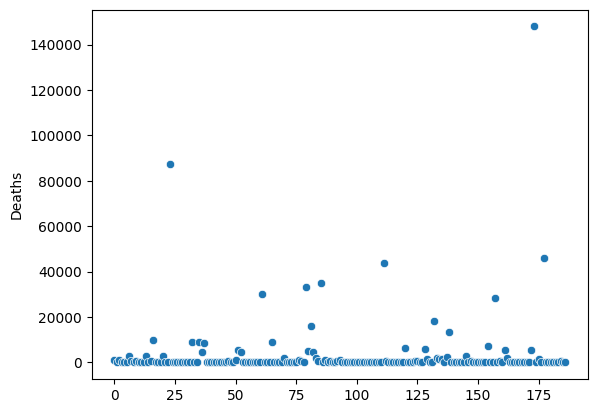

In [17]:
sns.scatterplot(covid['Deaths'])

##### The dataset has clear outliers in the 'Deaths' column. These outliers are:
    Statistically significant (shown in boxplot),Visually prominent (seen in scatterplot),

### Method 2 :- Interquartile Range(IQR) Method

In [20]:
q1=covid['Deaths'].quantile(.25)
q3=covid['Deaths'].quantile(.75)
IQR=q3-q1

In [21]:
upper_quantile=q3+1.5*IQR
lower_quantile=q1-1.5*IQR
print(upper_quantile,lower_quantile)

1807.25 -1054.75


In [22]:
Outlier=covid[(covid['Deaths']>=upper_quantile) | (covid['Deaths']<=lower_quantile)]

In [23]:
Outlier.head(3)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
13,Bangladesh,226225,2965,125683,97577,2772,37,1801,1.31,55.56,2.36,207453,18772,9.05,South-East Asia
16,Belgium,66428,9822,17452,39154,402,1,14,14.79,26.27,56.28,64094,2334,3.64,Europe


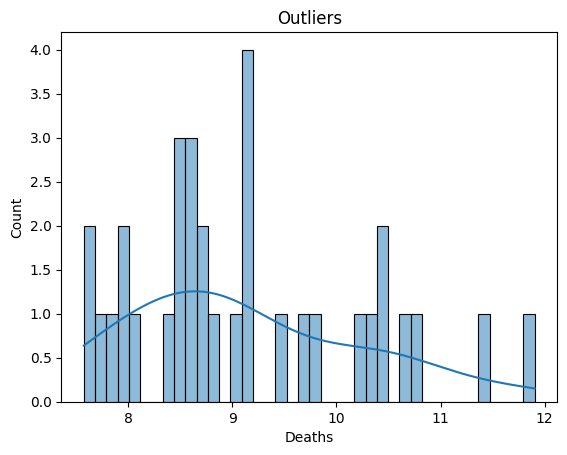

In [24]:
sns.histplot(np.log1p(Outlier['Deaths']),kde=True,bins=40)
plt.title('Outliers')
plt.show()

#### The dataset has clear outliers in the 'Deaths' column. These outliers are:
        The IQR method confirms the presence of extreme outliers in the 'Deaths' column
        The use of log transformation helps normalize the skewed distribution for better visualization.

# Outlier Remove

#### IQR method 1

In [28]:
q1=covid['Deaths'].quantile(.25)
q3=covid['Deaths'].quantile(.75)
IQR=q3-q1

In [29]:
upper_quantile=q3+1.5*IQR
lower_quantile=q1-1.5*IQR
print(upper_quantile,lower_quantile)

1807.25 -1054.75


In [37]:
without_outliers=covid[(covid['Deaths']<=upper_quantile) | (covid['Deaths']>=lower_quantile)]

<Axes: xlabel='Deaths', ylabel='Count'>

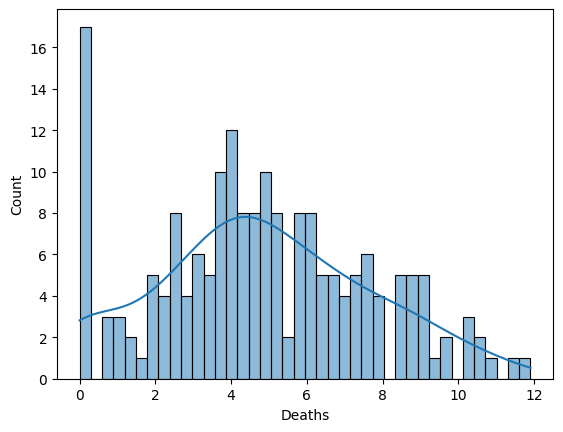

In [38]:
sns.histplot(np.log1p(without_outliers['Deaths']),kde=True,bins=40)

##### Above the method ,i remove outlier using interquaritle range(IQR)

#### IQR method 2 (outliers fit into range)

In [48]:
q1=covid['Deaths'].quantile(.25)
q3=covid['Deaths'].quantile(.75)
IQR=q3-q1

In [49]:
upper_quantile=q3+1.5*IQR
lower_quantile=q1-1.5*IQR
print(upper_quantile,lower_quantile)

1807.25 -1054.75


In [53]:
covid['Deaths']=np.where(
        covid['Deaths']>upper_quantile,
        upper_quantile,
        np.where(
            covid['Deaths']<lower_quantile,
            lower_quantile
            ,covid['Deaths'])
)

<Axes: xlabel='Deaths', ylabel='Count'>

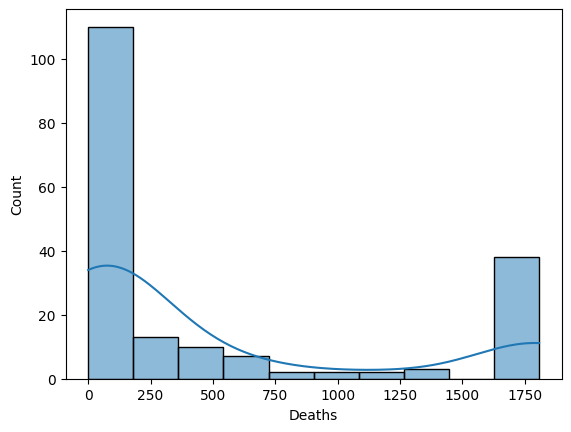

In [55]:
sns.histplot(covid['Deaths'],kde=True,bins=10)

##### Outliers were adjusted to fall within the lower and upper quartile limits.

# EDA

### EDA --> Below i check ,Top 10 countries with the highest confirmed cases

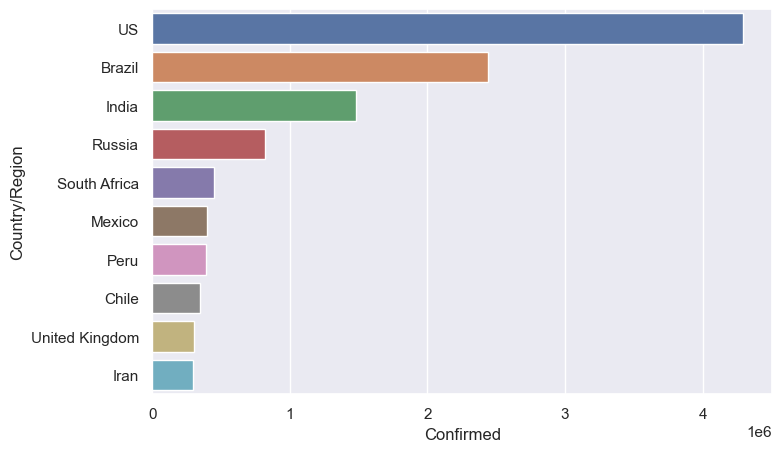

In [201]:
highest_case=covid.sort_values(by="Confirmed",ascending=False).reset_index(drop=True).head(10)
sns.barplot(data=highest_case,x='Confirmed',y='Country/Region',hue='Country/Region');

In [66]:
highest_case.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,US,4290259,1807.25,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
1,Brazil,2442375,1807.25,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
2,India,1480073,1807.25,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
3,Russia,816680,1807.25,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
4,South Africa,452529,1807.25,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa


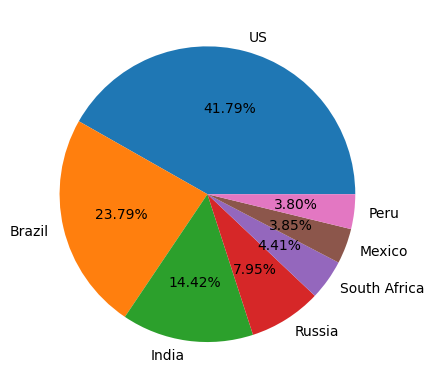

In [67]:
plt.pie(labels=highest_case['Country/Region'],x=highest_case['Confirmed'],autopct='%0.2f%%');

##### Above the plot, we can see the highest coses in us , Brazil ,India and Russia

###  EDA --> Top 10 countries with the highest deaths

In [74]:
highest_deaths=covid.sort_values(by='Deaths',ascending=False).reset_index().head(8)

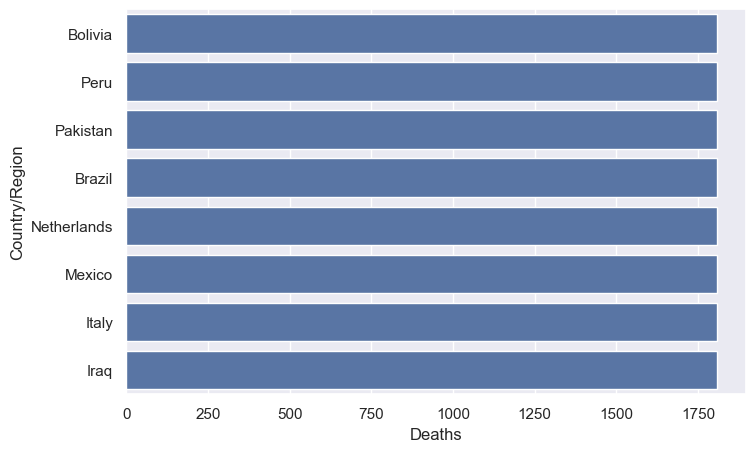

In [203]:
sns.barplot(data=highest_deaths,y="Country/Region",x="Deaths");

In [78]:
highest_deaths.Deaths.unique()

array([1807.25])

#### the Deaths column, it was found that multiple countries have the exact same death count value (1807.25), which is unrealistic for real-world COVID-19 data.

# EDA --> Top 10 countries with the highest recovered cases

In [83]:
high_recover=covid.sort_values(by='Recovered',ascending=False).reset_index().head(8)

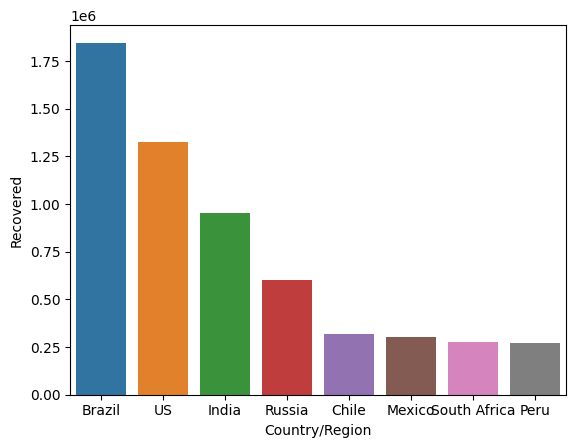

In [85]:
sns.barplot(data=high_recover,y='Recovered',x='Country/Region',hue='Country/Region');

#### The highest recovery successs rates of Brazil , US ,India and Russia countries

## EDA --> Where COVID-19 is spreading the fastest.

In [90]:
covid.head(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269.0,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144.0,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163.0,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52.0,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41.0,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [147]:
one_week_increase=covid.sort_values(by="1 week % increase",ascending=False).reset_index().head(5)

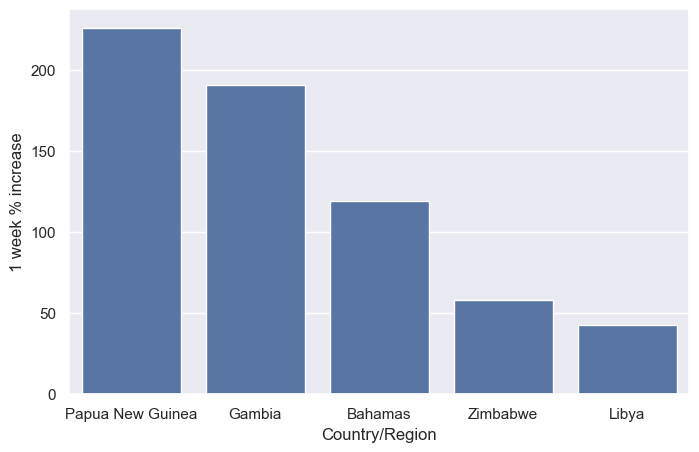

In [149]:
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(data=one_week_increase,x='Country/Region',y='1 week % increase');

#### Papua New Guinea, Gambia and Bahamas see highest spread of COVID-19 cases in a week

## EDA--> Which WHO Region has the more cases campared to other regions?

In [168]:
WHO_region=covid.groupby('WHO Region')['Confirmed'].sum().reset_index()
WHO_region 

,WHO Region,Confirmed
0,Africa,723207
1,Americas,8839286
2,Eastern Mediterranean,1490744
3,Europe,3299523
4,South-East Asia,1835297
5,Western Pacific,292428


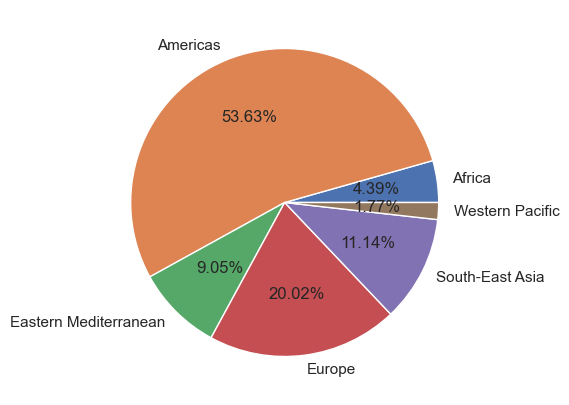

In [180]:
plt.pie(labels=WHO_region['WHO Region'],x=WHO_region['Confirmed'],autopct='%0.2f%%');

#### Americs region highest confirmed cases (53.63%) 

### Conclusion
1)  Brazil has controlled COVID-19 cases better than the US and India, and currently has fewer cases than both countries.

2) Papua New Guinea, Gambia countries are failed the control the new cases Because covid spread rapidly here

3) More than 50% of total cases in the United States.